In [12]:
import pandas as pd
import XCCourseHelper as XC
import os
import matplotlib.pyplot as plt

In [4]:
directory = "Courses/ATB"
dfs = []
CourseInformationList = []

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    print(filename)
    if filename.endswith(".gpx"):
        FilePath = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(FilePath):
            CourseName = filename[0:-4]
            CourseInformation, df = XC.GetCourseInformation(CourseName, FilePath)
            CourseInformationList.append(CourseInformation)
            dfs.append(df)

CourseInformationDF = pd.concat(CourseInformationList, ignore_index=True)

strava__2346911231.gpx


C:\Users\jewalsh\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [6]:
CourseInformationDF

,Course,Turn Stdev,Total Degrees Turned,Perimeters/Total Distance,Course Area (m^2),Number of Hairpin Turns,Hill Stdev,Tallest Hill (m),Length of tallest hill (m),Number of Hills,Total Elevation Gain (m),Total Elevation Gain Unfiltered (m),Start Lat,Start Lon,Course Ave. GAP - Strava,Course Ave. GAP - Minetti
0,strava__2346911231,17.042252,47226.9515,30386.074594,3.645288e+07,36,10.661957,35.1,2.652,13,1515.6,1515.6,43.259951,-79.872712,-6.560865e+07,7.159695e+07


<AxesSubplot:xlabel='Distance'>

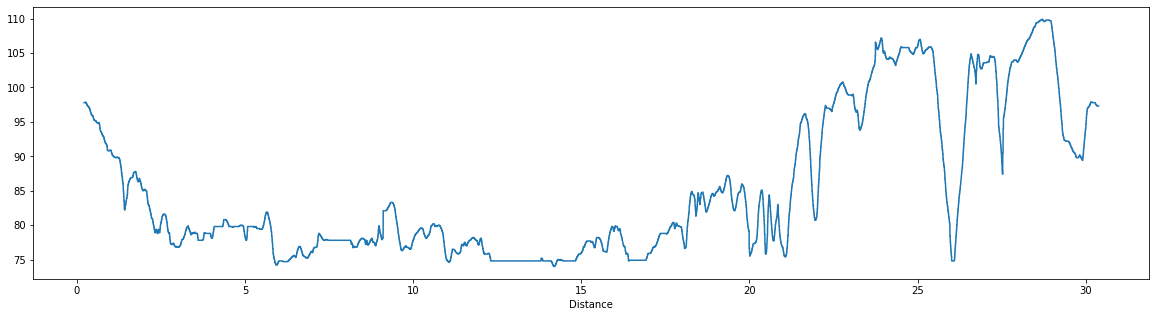

In [10]:
df['Elevation'].plot(figsize=(20,5))

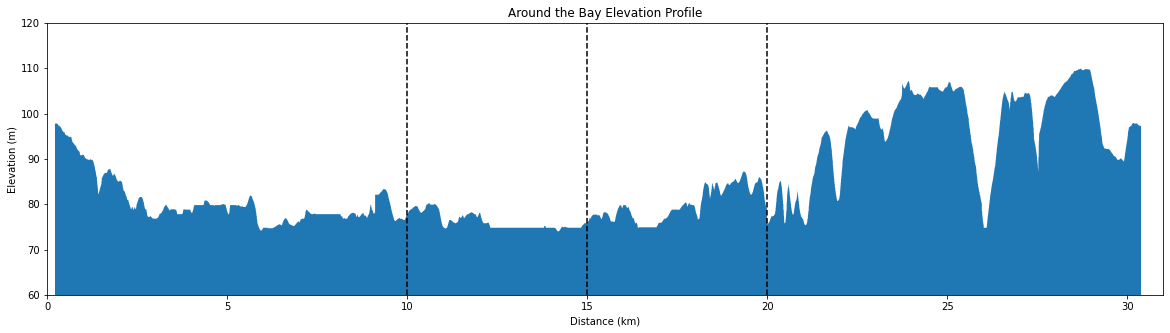

In [24]:
def PlotElevationProfile(df):
    fig = plt.figure(figsize=(20,5))
    plt.fill_between(x=df.index, y1=0, y2=df['Elevation'])
    ymin = 60
    ymax = 120
    plt.ylim(ymin,ymax)
    plt.xlim(0,31)
    plt.xlabel('Distance (km)')
    plt.ylabel('Elevation (m)')
    plt.vlines(x=[10,15,20], ymin=ymin, ymax=ymax, colors='k', linestyles='dashed')
    plt.title('Around the Bay Elevation Profile')
    plt.show()

PlotElevationProfile(df)


In [26]:
df.to_csv('./Course DataFrames/ATB30km.csv')
CourseInformationDF.to_csv('./Course DataFrames/ATB30kmInfo.csv')

In [27]:
df.head()

,time,Lat,Lon,Elevation,Elevation SavGol,Elevation SavGol Difference,Elevation Difference,Time Difference,DistanceChangeInKM,Angle Difference,PaceInMinPerKM,pace,Distance,Gradient,GAP
Distance,,,,,,,,,,,,,,,
0.212864,1970-01-01 00:00:06.000000000,43.259951,-79.872712,97.8,97.80384,-0.019103,0.0,1.0,0.005549,8.573175,3.003805,3.535169,0.212864,NaN,NaN
0.213000,1970-01-01 00:00:06.026173626,43.259951,-79.872712,97.8,97.80384,-0.019103,0.0,1.0,0.005549,8.573175,3.003805,3.526886,0.213000,NaN,NaN
0.214000,1970-01-01 00:00:06.219112673,43.259951,-79.872712,97.8,97.80384,-0.019103,0.0,1.0,0.005549,8.573175,3.003805,3.569796,0.214000,NaN,NaN
0.215000,1970-01-01 00:00:06.412051720,43.259951,-79.872712,97.8,97.80384,-0.019103,0.0,1.0,0.005549,8.573175,3.003805,3.612707,0.215000,NaN,NaN
0.216000,1970-01-01 00:00:06.604990767,43.259951,-79.872712,97.8,97.80384,-0.019103,0.0,1.0,0.005549,8.573175,3.003805,3.655618,0.216000,NaN,NaN
